Лабораторная работа
=====================

Цель лабораторной работы получить практические знания по работе с признаками на известном датасете статистики самоубийств.

Вам необходимо будет подготовить данные для обучения линейной модели предсказания количества самоубийств (столбец - suicides/100k pop).

Чек-лист:
0. Изучите файл annotation.txt. Там содержится информация о датасете.
1. Загрузите датасет data.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите линейную модель. Напишите в markdown свои наблюдения по полученным результатам.

In [1]:
conda install -c anaconda pandas-profiling

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
conda update conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Public\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |           py37_0         2.9 MB
    conda-package-handling-1.6.1|   py37h62dcd97_0         612 KB
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be REMOVED:

  python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda-package-han~                   1.6.0-py37h62dcd97_0 --> 1.6.1-py37h62dcd97_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                            anaconda --> pkgs/main




conda-4.8.4          | 2.9 MB    |            |   0% 
conda-4.8.4          | 2.9 MB    |          

In [ ]:
!pip uninstall seaborn

In [5]:
!pip install matplotlib-3.3.1-cp37-cp37m-win_amd64.whl

Processing d:\netology\feature_engineering\лабораторная\matplotlib-3.3.1-cp37-cp37m-win_amd64.whl


In [1]:
!pip install seaborn-0.10.1-py3-none-any.whl

Processing d:\netology\feature_engineering\лабораторная\seaborn-0.10.1-py3-none-any.whl


In [1]:
!conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
!pip install pandas_profiling

  Using cached pandas_profiling-2.8.0-py2.py3-none-any.whl (259 kB)
  Using cached phik-0.10.0-py3-none-any.whl (599 kB)
  Using cached visions-0.4.4-py3-none-any.whl (59 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached tangled_up_in_unicode-0.0.6-py3-none-any.whl (3.1 MB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Using cached confuse-1.3.0-py2.py3-none-any.whl (64 kB)
  Using cached ImageHash-4.1.0.tar.gz (291 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=1d5593b845b1fd3897d0bf683dc09aa6733d7617105511d4f7f01f6e3c4996ee
  Stored in directory: c:\users\динара\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291996 sha256=bf8f79a97c13492e61fa86564e3f6b680b2e9ed38b8a12032301562408673830
  Stored in directory: c:\users\динара\appdata\local\pip\cache\wheels\cc\57\bb\6f9f52a6d8187b8f806210e337

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling


from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport

In [5]:
data = pd.read_csv('data.csv')
data.head()

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           NaN      2,156,624,900                 796   
1  Albania1987           NaN      2,156,624,900                 796   
2  Albania1987           NaN      2,156,624,900                 796   
3  Albania1987           NaN      2,156,624,900                 796   
4  Albania1987           NaN      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [6]:
data.shape

(27820, 10)

In [7]:
data.describe()

suicides_no    population  suicides/100k pop  HDI for year  \
count  27820.000000  2.782000e+04       27820.000000   8364.000000   
mean     242.574407  1.844794e+06          12.816097      0.776601   
std      902.047917  3.911779e+06          18.961511      0.093367   
min        0.000000  2.780000e+02           0.000000      0.483000   
25%        3.000000  9.749850e+04           0.920000      0.713000   
50%       25.000000  4.301500e+05           5.990000      0.779000   
75%      131.000000  1.486143e+06          16.620000      0.855000   
max    22338.000000  4.380521e+07         224.970000      0.944000   

       gdp_per_capita ($)  
count        27820.000000  
mean         16866.464414  
std          18887.576472  
min            251.000000  
25%           3447.000000  
50%           9372.000000  
75%          24874.000000  
max         126352.000000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 27820 non-null  object 
 1   age                 27820 non-null  object 
 2   suicides_no         27820 non-null  int64  
 3   population          27820 non-null  int64  
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   HDI for year        8364 non-null   float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.6+ MB


Итак, предварительно о датасете можно сказать вот что:
1. Показатель suicides/100k pop получается из деления suicides_no на population, т.е. suicides_no и population необходимо будет убрать, чтобы не создавать мультиколлинеарность.
2. Показатель gdp_for_year представлен в некорректном виде - его необходимо пребразовать в числовое значение
3. Показатель HDI for year заполнен только в 8364 случаях из 27820. Это Индекс человеческого развития и многие страны отказываются или не имеют возможности предоставить данные о нем. Пока неясно, как поступать с пропусками и вообще с этим показателем. Чисто с человеческой точки зрения он кажется существенным в деле предсказания количества самоубийств, однако на гуманитарном портале написано, что "та часть данных, которая предоставлена национальными статистическими организациями, не всегда достоверна, поскольку некоторые правительства сознательно приукрашивают ситуацию в своих странах". Поэтому, возможно, придётся вовсе отказаться от данного показателя.
4. Показатель country-year необходимо будет разделить на 2 столбца
5. Разброс показателя gdp_per_capita ($) (ВВП) очень большой - от 251 до 126352. Пока неясно, корректно это или нет.

In [19]:
data['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [20]:
data['age'].value_counts()

15-24 years    4642
55-74 years    4642
75+ years      4642
35-54 years    4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

In [21]:
data['country-year'].value_counts()

Armenia1999        12
Australia1986      12
Netherlands2011    12
Norway2004         12
Brazil1994         12
                   ..
Romania2016        10
Sweden2016         10
Croatia2016        10
Austria2016        10
Mauritius2016      10
Name: country-year, Length: 2321, dtype: int64

Согласно Теории поколений Уильяма Штрауса и Нила Хоува по дате рождения люди делятся на следующие категории:
- Generation X - 1963-1983
- Silent - 1925-1945
- Millenials - 1981-1996
- Boomers - 1940-1959
- G.I. Generation - 1900-1923
- Generation Z - 2000-2017

Можно заметить, что если сопоставить год смерти из столбца country-year со столбцом age (возрастом погибших), то мы по сути можем получить данные столбца generation (поколение умерших). Таким образом для исследования все 3 показателя мы оставить не можем, какой-то 1 из них надо будет удалить, чтобы избежать мультиколлинеарности.

Для начала просто приведём все данные в корректный вид:

In [9]:
year = r'([0-9]+)'
data['year'] = data['country-year'].str.extract(year).values.reshape(-1)
country = r'([A-z]+)'
data['country'] = data['country-year'].str.extract(country).values.reshape(-1)
data['gdp_for_year ($)'] = [col.replace(',', '') for col in data[' gdp_for_year ($) ']]
data['gdp_for_year ($)'] = data['gdp_for_year ($)'].astype(float)
data.drop(['country-year', ' gdp_for_year ($) '], axis=1, inplace=True)
data.head(5)

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

   HDI for year  gdp_per_capita ($)       generation  year  country  \
0           NaN                 796     Generation X  1987  Albania   
1           NaN                 796           Silent  1987  Albania   
2           NaN                 796     Generation X  1987  Albania   
3           NaN                 796  G.I. Generation  1987  Albania   
4           NaN                 796          Boomers  1987  Albania   

   gdp_for_year ($)  
0      2.156625e+09  
1      2.156625e+09  
2      2.156625e+09  
3      2.156625e+09  
4      2.156625e+09

In [10]:
data.describe()

suicides_no    population  suicides/100k pop  HDI for year  \
count  27820.000000  2.782000e+04       27820.000000   8364.000000   
mean     242.574407  1.844794e+06          12.816097      0.776601   
std      902.047917  3.911779e+06          18.961511      0.093367   
min        0.000000  2.780000e+02           0.000000      0.483000   
25%        3.000000  9.749850e+04           0.920000      0.713000   
50%       25.000000  4.301500e+05           5.990000      0.779000   
75%      131.000000  1.486143e+06          16.620000      0.855000   
max    22338.000000  4.380521e+07         224.970000      0.944000   

       gdp_per_capita ($)  gdp_for_year ($)  
count        27820.000000      2.782000e+04  
mean         16866.464414      4.455810e+11  
std          18887.576472      1.453610e+12  
min            251.000000      4.691962e+07  
25%           3447.000000      8.985353e+09  
50%           9372.000000      4.811469e+10  
75%          24874.000000      2.602024e+11  
max         126352.000000      1.812071e+13

Оценим зависимости переменных между собой.

Прежде всего изучим данные профайлера (profile_report)

In [11]:
pandas_profiling.ProfileReport(data)

Категориальный признак country показывает высокую кардинальность, а у признака age в каждом классе одинаковое число элементов. Данная информация может оказаться полезной.

Построим матрицу корреляций:

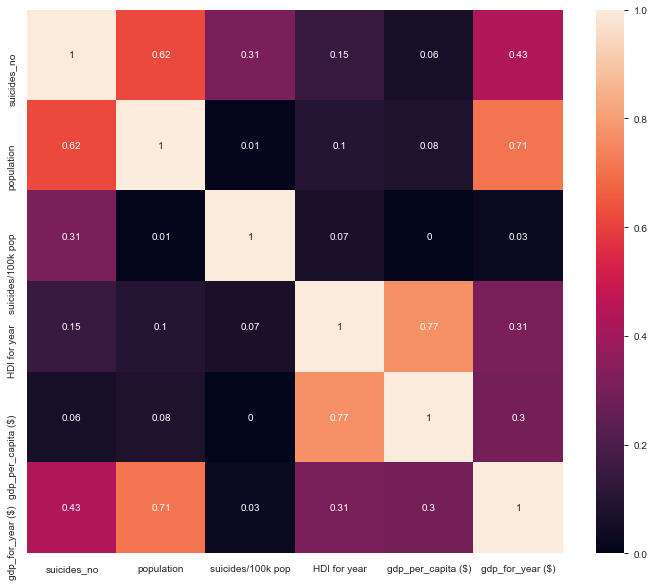

In [12]:
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

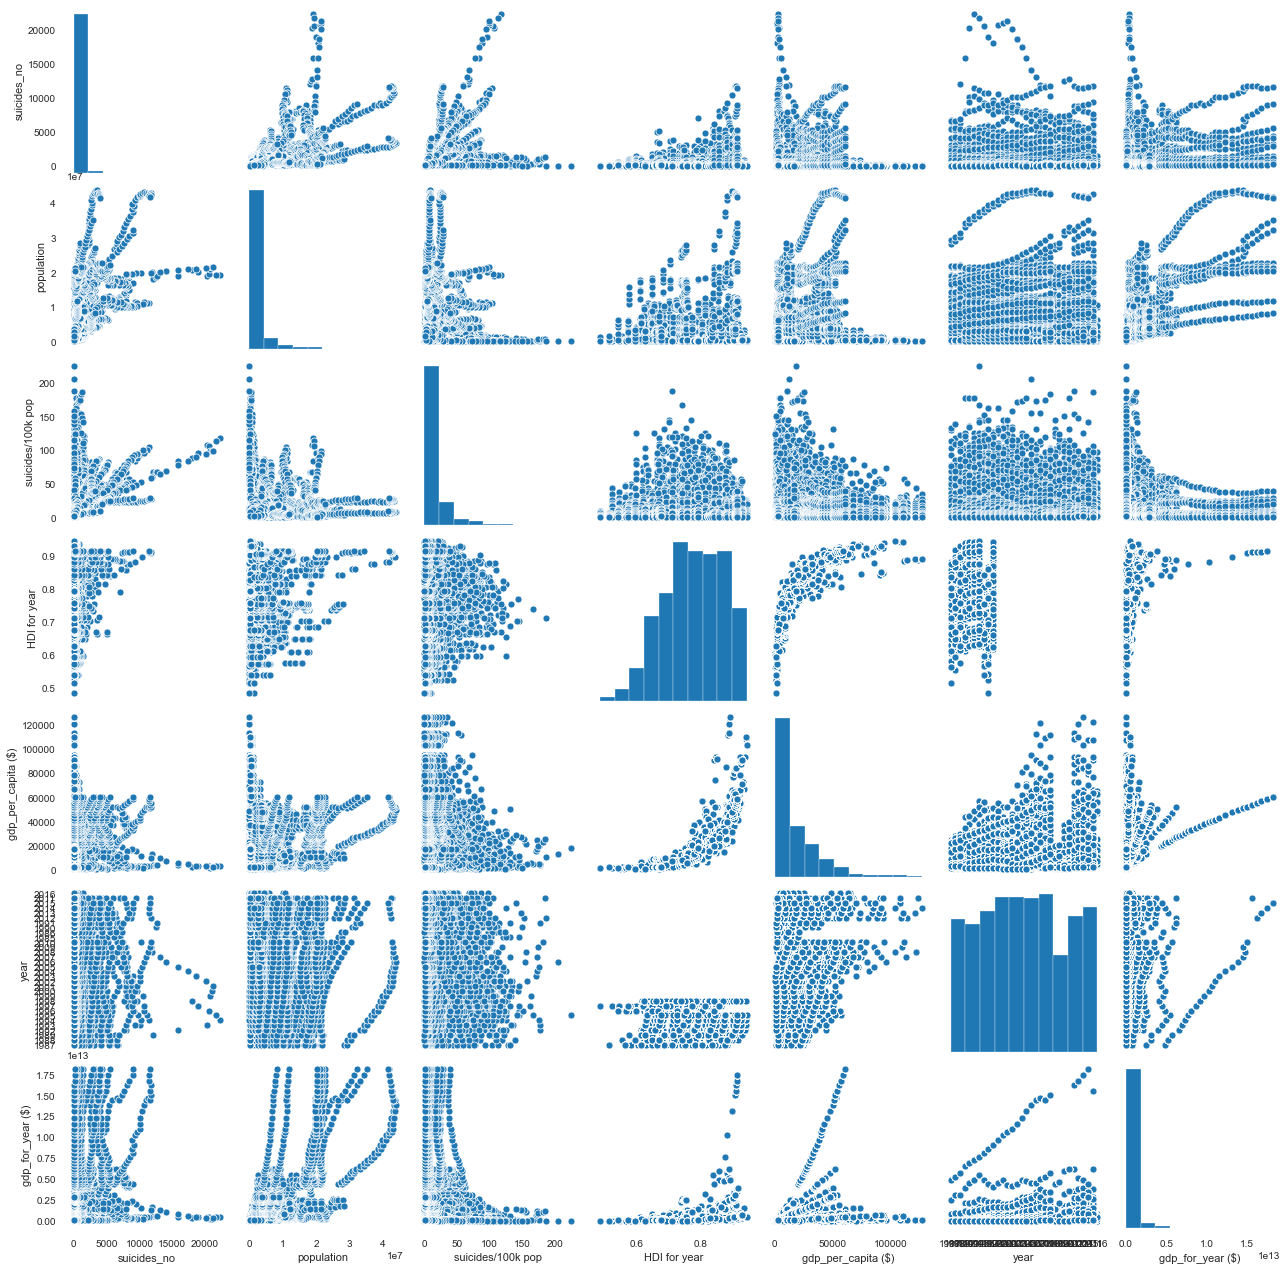

In [13]:
sns_plot = sns.pairplot(data)
sns_plot

Итак, у нас не наблюдается явная корреляция между признаками (больше 95%), т.е. у нас не наблюдается мультиколлинеаронсти между вещественными показателями.

Попробуем убрать качественный показатель country, поскольку он очень кардинален, и у нас есть показатель ВВП, который вполне характеризует уровень развития страны. Также удалим HDI for year, поскольку в нём много пропусков, и он может быть ложным, как мы узнали в начале исследования. Также удалим year, поскольку у нас есть generation и age, из которых year легко получается, и, значит, он является дублирующим признаком.

In [29]:
data2 = data.drop(['HDI for year', 'year', 'country'], axis=1)
data2.head()

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

   gdp_per_capita ($)       generation  gdp_for_year ($)  
0                 796     Generation X      2.156625e+09  
1                 796           Silent      2.156625e+09  
2                 796     Generation X      2.156625e+09  
3                 796  G.I. Generation      2.156625e+09  
4                 796          Boomers      2.156625e+09

Сделаем категориальные признаки адекватными для моделей:

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_enc = LabelEncoder()
oh_enc = OneHotEncoder()

In [30]:
gener_features = oh_enc.fit_transform(data[['generation']]).toarray()
gener_features = pd.DataFrame(gener_features, columns=oh_enc.categories_[0])
gener_features.head(5)

Boomers  G.I. Generation  Generation X  Generation Z  Millenials  Silent
0      0.0              0.0           1.0           0.0         0.0     0.0
1      0.0              0.0           0.0           0.0         0.0     1.0
2      0.0              0.0           1.0           0.0         0.0     0.0
3      0.0              1.0           0.0           0.0         0.0     0.0
4      1.0              0.0           0.0           0.0         0.0     0.0

In [31]:
age_features = oh_enc.fit_transform(data[['age']]).toarray()
age_features = pd.DataFrame(age_features, columns=oh_enc.categories_[0])
age_features.head(5)

15-24 years  25-34 years  35-54 years  5-14 years  55-74 years  75+ years
0          1.0          0.0          0.0         0.0          0.0        0.0
1          0.0          0.0          1.0         0.0          0.0        0.0
2          1.0          0.0          0.0         0.0          0.0        0.0
3          0.0          0.0          0.0         0.0          0.0        1.0
4          0.0          1.0          0.0         0.0          0.0        0.0

In [32]:
s_features = oh_enc.fit_transform(data[['sex']]).toarray()
s_features = pd.DataFrame(s_features, columns=oh_enc.categories_[0])
s_features.head(5)

female  male
0     0.0   1.0
1     0.0   1.0
2     1.0   0.0
3     0.0   1.0
4     0.0   1.0

In [33]:
data2 = data2.reset_index(drop=True)
data2.head(5)

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

   gdp_per_capita ($)       generation  gdp_for_year ($)  
0                 796     Generation X      2.156625e+09  
1                 796           Silent      2.156625e+09  
2                 796     Generation X      2.156625e+09  
3                 796  G.I. Generation      2.156625e+09  
4                 796          Boomers      2.156625e+09

In [34]:
data2 = data2.join(gener_features)
data2.drop(['generation'], axis=1, inplace=True)
data2.head(5)

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

   gdp_per_capita ($)  gdp_for_year ($)  Boomers  G.I. Generation  \
0                 796      2.156625e+09      0.0              0.0   
1                 796      2.156625e+09      0.0              0.0   
2                 796      2.156625e+09      0.0              0.0   
3                 796      2.156625e+09      0.0              1.0   
4                 796      2.156625e+09      1.0              0.0   

   Generation X  Generation Z  Millenials  Silent  
0           1.0           0.0         0.0     0.0  
1           0.0           0.0         0.0     1.0  
2           1.0           0.0         0.0     0.0  
3           0.0           0.0         0.0     0.0  
4           0.0           0.0         0.0     0.0

In [35]:
data2 = data2.join(age_features)
data2.drop(['age'], axis=1, inplace=True)
data2.head(5)

sex  suicides_no  population  suicides/100k pop  gdp_per_capita ($)  \
0    male           21      312900               6.71                 796   
1    male           16      308000               5.19                 796   
2  female           14      289700               4.83                 796   
3    male            1       21800               4.59                 796   
4    male            9      274300               3.28                 796   

   gdp_for_year ($)  Boomers  G.I. Generation  Generation X  Generation Z  \
0      2.156625e+09      0.0              0.0           1.0           0.0   
1      2.156625e+09      0.0              0.0           0.0           0.0   
2      2.156625e+09      0.0              0.0           1.0           0.0   
3      2.156625e+09      0.0              1.0           0.0           0.0   
4      2.156625e+09      1.0              0.0           0.0           0.0   

   Millenials  Silent  15-24 years  25-34 years  35-54 years  5-14 years  \
0         0.0     0.0          1.0          0.0          0.0         0.0   
1         0.0     1.0          0.0          0.0          1.0         0.0   
2         0.0     0.0          1.0          0.0          0.0         0.0   
3         0.0     0.0          0.0          0.0          0.0         0.0   
4         0.0     0.0          0.0          1.0          0.0         0.0   

   55-74 years  75+ years  
0          0.0        0.0  
1          0.0        0.0  
2          0.0        0.0  
3          0.0        1.0  
4          0.0        0.0

In [22]:
data2 = data2.join(age_features)
data2.drop(['age'], axis=1, inplace=True)
data2.head(5)

sex  suicides_no  population  suicides/100k pop  gdp_per_capita ($)  \
0    male           21      312900               6.71                 796   
1    male           16      308000               5.19                 796   
2  female           14      289700               4.83                 796   
3    male            1       21800               4.59                 796   
4    male            9      274300               3.28                 796   

   gdp_for_year ($)  Boomers  G.I. Generation  Generation X  Generation Z  \
0      2.156625e+09      0.0              0.0           1.0           0.0   
1      2.156625e+09      0.0              0.0           0.0           0.0   
2      2.156625e+09      0.0              0.0           1.0           0.0   
3      2.156625e+09      0.0              1.0           0.0           0.0   
4      2.156625e+09      1.0              0.0           0.0           0.0   

   Millenials  Silent  15-24 years  25-34 years  35-54 years  5-14 years  \
0         0.0     0.0          1.0          0.0          0.0         0.0   
1         0.0     1.0          0.0          0.0          1.0         0.0   
2         0.0     0.0          1.0          0.0          0.0         0.0   
3         0.0     0.0          0.0          0.0          0.0         0.0   
4         0.0     0.0          0.0          1.0          0.0         0.0   

   55-74 years  75+ years  
0          0.0        0.0  
1          0.0        0.0  
2          0.0        0.0  
3          0.0        1.0  
4          0.0        0.0

In [36]:
data2 = data2.join(s_features)
data2.drop(['sex'], axis=1, inplace=True)
data2.head(5)

suicides_no  population  suicides/100k pop  gdp_per_capita ($)  \
0           21      312900               6.71                 796   
1           16      308000               5.19                 796   
2           14      289700               4.83                 796   
3            1       21800               4.59                 796   
4            9      274300               3.28                 796   

   gdp_for_year ($)  Boomers  G.I. Generation  Generation X  Generation Z  \
0      2.156625e+09      0.0              0.0           1.0           0.0   
1      2.156625e+09      0.0              0.0           0.0           0.0   
2      2.156625e+09      0.0              0.0           1.0           0.0   
3      2.156625e+09      0.0              1.0           0.0           0.0   
4      2.156625e+09      1.0              0.0           0.0           0.0   

   Millenials  Silent  15-24 years  25-34 years  35-54 years  5-14 years  \
0         0.0     0.0          1.0          0.0          0.0         0.0   
1         0.0     1.0          0.0          0.0          1.0         0.0   
2         0.0     0.0          1.0          0.0          0.0         0.0   
3         0.0     0.0          0.0          0.0          0.0         0.0   
4         0.0     0.0          0.0          1.0          0.0         0.0   

   55-74 years  75+ years  female  male  
0          0.0        0.0     0.0   1.0  
1          0.0        0.0     0.0   1.0  
2          0.0        0.0     1.0   0.0  
3          0.0        1.0     0.0   1.0  
4          0.0        0.0     0.0   1.0

Нормализуем данные:

In [40]:
bool_cols = ['Boomers', 'G.I. Generation', 'Generation X', 'Generation Z', 'Millenials', 'Silent', '15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years', 'female', 'male']
real_vars = data2.drop(bool_cols + ['suicides/100k pop'], axis=1)
cat_vars = data2[bool_cols]

y = data2['suicides/100k pop']

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
mm_scaled_real_vars = mm_scaler.fit_transform(real_vars)
mm_scaled_real_vars = pd.DataFrame(mm_scaled_real_vars, columns=real_vars.columns)
mm_scaled_real_vars.head(5)

suicides_no  population  gdp_per_capita ($)  gdp_for_year ($)
0     0.000940    0.007137            0.004322          0.000116
1     0.000716    0.007025            0.004322          0.000116
2     0.000627    0.006607            0.004322          0.000116
3     0.000045    0.000491            0.004322          0.000116
4     0.000403    0.006256            0.004322          0.000116

In [44]:
X_mm = mm_scaled_real_vars.join(cat_vars)

In [45]:
from sklearn.model_selection import train_test_split

rand_state = 10

X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y, test_size=0.2, random_state=rand_state)

Построим линейную модель:

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()

model.fit(X_mm_train, y_mm_train)

train_pred = model.predict(X_mm_train)
test_pred = model.predict(X_mm_test)


train_mae = mean_absolute_error(train_pred, y_mm_train)
test_mae = mean_absolute_error(test_pred, y_mm_test)

print(f'Train MAE: {np.round(train_mae, 4)}')
print(f'Test MAE: {np.round(test_mae, 4)}')

# print(mean_squared_error(predicted_y, y_mm_test))
# print(mean_absolute_error(predicted_y, y_mm_test))

Train MAE: 9.4922
Test MAE: 9.4911


Точность модели составила порядка 75%